# InSituPy demonstration

In [1]:
## The following code ensures that all functions and init files are reloaded before executions.
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from insitupy.io import download_url
import shutil
import os

## Get example data for demonstration

To demonstrate the functionalities of InSituPy, we use publicly available data provided by 10x Genomics. The dataset for this tutorial can be found here: 

https://www.10xgenomics.com/products/xenium-in-situ/preview-dataset-human-breast

The code shown below downloads the Xenium output files as well as the H&E and IF images and structures them for reading the data with `InSituPy`

Following parts of the dataset are downloaded:
1. Xenium output files: 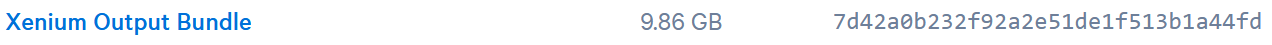
2. Unregistered H&E image: 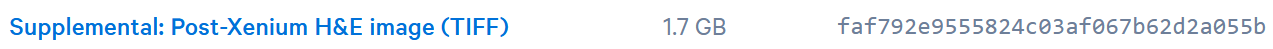
3. Unregistered IF image: 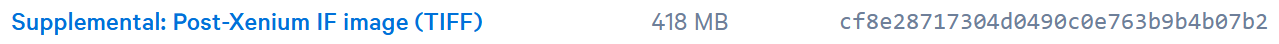

The unregistered images into a folder named `unregistered_images` and the xenium output file is downloaded as a .zip file and placed into `./demo_dataset`.

In [3]:
# prepare paths
out_dir = Path("demo_dataset") # output directory
image_dir = out_dir / "unregistered_images" # directory for images

In [4]:

# URLs for the data
xeniumdata_url = "https://cf.10xgenomics.com/samples/xenium/1.0.1/Xenium_FFPE_Human_Breast_Cancer_Rep1/Xenium_FFPE_Human_Breast_Cancer_Rep1_outs.zip"
he_url = "https://cf.10xgenomics.com/samples/xenium/1.0.1/Xenium_FFPE_Human_Breast_Cancer_Rep1/Xenium_FFPE_Human_Breast_Cancer_Rep1_he_image.tif"
if_url = "https://cf.10xgenomics.com/samples/xenium/1.0.1/Xenium_FFPE_Human_Breast_Cancer_Rep1/Xenium_FFPE_Human_Breast_Cancer_Rep1_if_image.tif"

#### Image requirements

The unregistered images are downloaded into a folder named `unregistered_images`.

The images can be either stored as `.tif` or `.ome.tif` and need to be name using following structure: `"{slide_id}__{region_id}__{image_names}__{image_type}"`, with:
- `slide_id`: ID found on the Xenium slide.
- `region_id`: ID for the sample on the Xenium slide.
- `image_names`: Name of the image. In case of multi-channel `"IF"` images, this is expeted to be a `"_"`-separated list of names (e.g. `"CD20_HER2_DAPI"`). For `"histo"` RGB images it is only one name (e.g. `"HE"`)
- `image_type`: Type of image. Can be either `"histo"` for RGB images or `"IF"` for (multi-channel) grayscale images.
    

In [5]:
# download the image data and save into a folder called "unregistered_images"
download_url(if_url, out_dir=image_dir, file_name="slide_id__sample_id__CD20_HER2_DAPI__IF")
download_url(he_url, out_dir=image_dir, file_name="slide_id__sample_id__HE__histo")

demo_dataset\unregistered_images\slide_id__sample_id__CD20_HER2_DAPI__IF.tif:  44%|████▍     | 175M/398M [00:16<00:19, 11.8MiB/s] 

#### Xenium data requirements

The Xenium output files are downloaded, unzipped and moved into a folder called `output-XETG00000__slide_id__sample_id`.

In [ ]:
# download the xenium dta and save into a folder containing information about slide id and sample id
download_url(xeniumdata_url, out_dir=out_dir)

demo_dataset\Xenium_FFPE_Human_Breast_Cancer_Rep1_outs.zip: 100%|██████████| 9.18G/9.18G [14:14<00:00, 11.5MiB/s]


In [ ]:
# unzip the data archive
zip_file = list(out_dir.glob("*.zip"))[0]
data_dir = out_dir / "output-XETG00000__slide_id__sample_id"

In [ ]:
if data_dir.exists():
    print(f"Directory {data_dir} exists already. Probably this code has been run before already. Code is skipped")
else:
    shutil.unpack_archive(zip_file, data_dir)

    # move output files to right position
    for f in data_dir.glob("outs/*"):
        shutil.move(f, data_dir)
        
    # remove empty outs folder
    os.rmdir(data_dir / "outs")

The final structure of the data should look like this:

    ```
    ./demo_dataset
    ├───output-XETG00000__slide_id__sample_id
    │   ├───analysis
    │   │   ├───clustering
    │   │   ├───diffexp
    │   │   ├───pca
    │   │   ├───tsne
    │   │   └───umap
    │   └───cell_feature_matrix
    └───unregistered_images
    ```
